In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import pandas
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

In [3]:
_here = Path('.').resolve()
results_folder = _here / 'results/'

In [45]:
def parse_log(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
        lines = list(map(lambda line: line.strip(), lines))
        
    history = lines[1: ]  # first line is "# of param ..." and last is discardable
    history = map(lambda line: line.split('|')[-1], history)  # get just training history
    history = map(lambda line: [ np.float(x) for x in line.strip().split(',') ], history)  # csv
    return pd.DataFrame(history, columns=['epoch', 'step', 'train loss', 'lr'])

In [21]:
def get_figsize(n_rows, n_cols):
    row_size = 8  # heigth
    column_size = 20  # width

    return (n_cols * column_size, n_rows * row_size)


def get_figa(n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols, figsize=get_figsize(n_rows, n_cols))
    return fig, ax

In [48]:
history = parse_log(results_folder / 'auto.log')

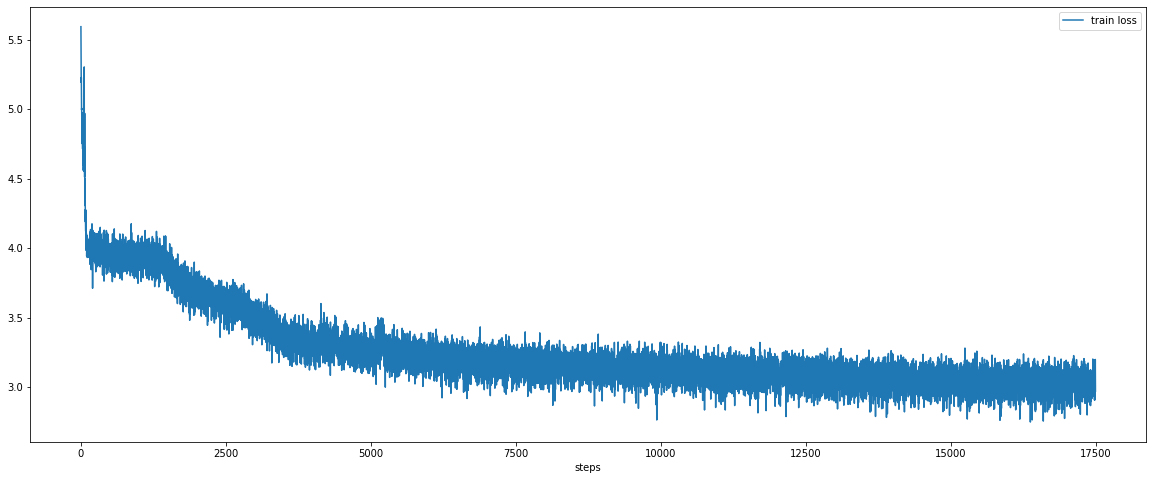

In [49]:
fig, axis = get_figa(1, 1)

key = 'train loss'
axis.plot(history.index, history[key], label=key)

axis.set_xlabel('steps')
axis.legend()

# plt.savefig(results_folder / 'history.png')